# Business Analysis & Recommendations

In [1]:
#Load data wrangling, visualization and datetime libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#Load and store dataset to a data frame
import warnings
warnings.simplefilter("ignore")

data = pd.read_excel("Sample_deliveries_data_1_month.xlsx")
data.head()

,Customer placed order datetime,Placed order with restaurant datetime,Driver at restaurant datetime,Delivered to consumer datetime,Driver ID,Restaurant ID,Consumer ID,Delivery Region,Is ASAP,Order total,Amount of discount,Amount of tip,Refunded amount
0,01 02:52:12,01 03:00:25,01 03:08:09,01 03:35:20,279,50,6738,Mountain View,True,16.33,0.0,0.82,0.0
1,13 15:58:57,13 17:56:45,13 18:24:39,13 18:57:01,303,96,64746,Palo Alto,True,76.14,0.0,6.45,0.0
2,17 19:02:37,17 19:12:51,17 19:19:59,17 19:31:09,212,190,12484,San Jose,True,16.77,6.0,2.52,0.0
3,12 04:01:57,12 04:08:18,12 04:13:02,12 04:37:57,352,194,13920,San Jose,True,25.03,0.0,5.00,0.0
4,08 23:46:38,08 23:49:32,08 23:54:29,09 00:37:15,313,9,7037,Palo Alto,True,51.57,0.0,5.16,0.0


In [3]:
#Inspect data frame to identify data types and if any missing data points
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18078 entries, 0 to 18077
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer placed order datetime         18078 non-null  object 
 1   Placed order with restaurant datetime  18038 non-null  object 
 2   Driver at restaurant datetime          13547 non-null  object 
 3   Delivered to consumer datetime         18078 non-null  object 
 4   Driver ID                              18078 non-null  int64  
 5   Restaurant ID                          18078 non-null  int64  
 6   Consumer ID                            18078 non-null  int64  
 7   Delivery Region                        18078 non-null  object 
 8   Is ASAP                                18078 non-null  bool   
 9   Order total                            18078 non-null  float64
 10  Amount of discount                     18078 non-null  float64
 11  Am

****
With both "Placed order with restaurant datetime" and "Driver at restaurant datetime" missing data some data points, I will be removing the empty observations/rows from this analysis because such information about recorded time is not easily replaceable (i.e., with 0), and with around 4,600 of missing observations/rows it may interefere with the analysis as we dive deeper to the time differences in the delivery process (from customer order to delivery arrival).
    
For the missing data points from these two columns, I will assume in "Placed order with restaurant datetime" the restuarant either experienced a glitch in their system or simply did not record the times of orders received on their machines or DoorDash application. For "Driver at restaurant datetime", I will assume either drivers forgot to record their drive time to the restaurant, the DoorDash application did not record the time, or the driver did not want to record their times on the application due to timing concerns.
****

In [4]:
#Drop rows of data with missing datatime stamps from "Placed order with restaurant datetime" and "Driver at restaurant datetime" columns
data.dropna(inplace=True)

#Inspect data table to ensure rows were dropped and that all available observations/rows have data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13524 entries, 0 to 18077
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer placed order datetime         13524 non-null  object 
 1   Placed order with restaurant datetime  13524 non-null  object 
 2   Driver at restaurant datetime          13524 non-null  object 
 3   Delivered to consumer datetime         13524 non-null  object 
 4   Driver ID                              13524 non-null  int64  
 5   Restaurant ID                          13524 non-null  int64  
 6   Consumer ID                            13524 non-null  int64  
 7   Delivery Region                        13524 non-null  object 
 8   Is ASAP                                13524 non-null  bool   
 9   Order total                            13524 non-null  float64
 10  Amount of discount                     13524 non-null  float64
 11  Am

In [5]:
#For use of column reference, replace blank spaces within column names with underscores
data.columns = data.columns.str.replace(" ", "_")

data.columns

Index(['Customer_placed_order_datetime',
       'Placed_order_with_restaurant_datetime',
       'Driver_at_restaurant_datetime', 'Delivered_to_consumer_datetime',
       'Driver_ID', 'Restaurant_ID', 'Consumer_ID', 'Delivery_Region',
       'Is_ASAP', 'Order_total', 'Amount_of_discount', 'Amount_of_tip',
       'Refunded_amount'],
      dtype='object')

In [6]:
#To make the first 4 datetime columns usable, convert the column objects to strings and then remove day as I assume all deliveries are basically same day deliveries
data.Customer_placed_order_datetime = pd.to_datetime(data.Customer_placed_order_datetime.str.strip(), format= "%d %H:%M:%S").dt.strftime("%H:%M:%S")
data.Placed_order_with_restaurant_datetime = pd.to_datetime(data.Placed_order_with_restaurant_datetime.str.strip(), format= "%d %H:%M:%S").dt.strftime("%H:%M:%S")
data.Driver_at_restaurant_datetime = pd.to_datetime(data.Driver_at_restaurant_datetime.str.strip(), format= "%d %H:%M:%S").dt.strftime("%H:%M:%S")
data.Delivered_to_consumer_datetime = pd.to_datetime(data.Delivered_to_consumer_datetime.str.strip(), format= "%d %H:%M:%S").dt.strftime("%H:%M:%S")

data.head()

,Customer_placed_order_datetime,Placed_order_with_restaurant_datetime,Driver_at_restaurant_datetime,Delivered_to_consumer_datetime,Driver_ID,Restaurant_ID,Consumer_ID,Delivery_Region,Is_ASAP,Order_total,Amount_of_discount,Amount_of_tip,Refunded_amount
0,02:52:12,03:00:25,03:08:09,03:35:20,279,50,6738,Mountain View,True,16.33,0.0,0.82,0.0
1,15:58:57,17:56:45,18:24:39,18:57:01,303,96,64746,Palo Alto,True,76.14,0.0,6.45,0.0
2,19:02:37,19:12:51,19:19:59,19:31:09,212,190,12484,San Jose,True,16.77,6.0,2.52,0.0
3,04:01:57,04:08:18,04:13:02,04:37:57,352,194,13920,San Jose,True,25.03,0.0,5.00,0.0
4,23:46:38,23:49:32,23:54:29,00:37:15,313,9,7037,Palo Alto,True,51.57,0.0,5.16,0.0


In [7]:
#Convert the datetime object columns to datetime data types in order to use for arithmetic
data.Customer_placed_order_datetime = data.Customer_placed_order_datetime.astype("datetime64[ns]")
data.Placed_order_with_restaurant_datetime = data.Placed_order_with_restaurant_datetime.astype("datetime64[ns]")
data.Driver_at_restaurant_datetime = data.Driver_at_restaurant_datetime.astype("datetime64[ns]")
data.Delivered_to_consumer_datetime = data.Delivered_to_consumer_datetime.astype("datetime64[ns]")

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13524 entries, 0 to 18077
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Customer_placed_order_datetime         13524 non-null  datetime64[ns]
 1   Placed_order_with_restaurant_datetime  13524 non-null  datetime64[ns]
 2   Driver_at_restaurant_datetime          13524 non-null  datetime64[ns]
 3   Delivered_to_consumer_datetime         13524 non-null  datetime64[ns]
 4   Driver_ID                              13524 non-null  int64         
 5   Restaurant_ID                          13524 non-null  int64         
 6   Consumer_ID                            13524 non-null  int64         
 7   Delivery_Region                        13524 non-null  object        
 8   Is_ASAP                                13524 non-null  bool          
 9   Order_total                            13524 non-null  float6

In [8]:
#Convert the time differences to minutes
Customer_to_restaurant_placed_order_min_diff = round((data.Placed_order_with_restaurant_datetime - data.Customer_placed_order_datetime).dt.seconds / 60, 0)
Restaurant_to_driver_at_restuarant_min_diff = round((data.Driver_at_restaurant_datetime - data.Placed_order_with_restaurant_datetime).dt.seconds / 60, 0)
Driver_to_delivered_to_consumer_min_diff = round((data.Delivered_to_consumer_datetime - data.Driver_at_restaurant_datetime).dt.seconds / 60, 0)
Customer_to_delivered_to_consumer_min_diff = round((data.Delivered_to_consumer_datetime - data.Customer_placed_order_datetime).dt.seconds / 60, 0)

In [9]:
#Add these converted minute difference columns to the original data table and transform them to integers
data.insert(4, "Customer_to_restaurant_placed_order_min_diff", Customer_to_restaurant_placed_order_min_diff.astype(int))
data.insert(5, "Restaurant_to_driver_at_restuarant_min_diff", Restaurant_to_driver_at_restuarant_min_diff.astype(int))
data.insert(6, "Driver_to_delivered_to_consumer_min_diff", Driver_to_delivered_to_consumer_min_diff.astype(int))
data.insert(7, "Customer_to_delivered_to_consumer_min_diff", Customer_to_delivered_to_consumer_min_diff.astype(int))

data.head()

,Customer_placed_order_datetime,Placed_order_with_restaurant_datetime,Driver_at_restaurant_datetime,Delivered_to_consumer_datetime,Customer_to_restaurant_placed_order_min_diff,Restaurant_to_driver_at_restuarant_min_diff,Driver_to_delivered_to_consumer_min_diff,Customer_to_delivered_to_consumer_min_diff,Driver_ID,Restaurant_ID,Consumer_ID,Delivery_Region,Is_ASAP,Order_total,Amount_of_discount,Amount_of_tip,Refunded_amount
0,2021-09-25 02:52:12,2021-09-25 03:00:25,2021-09-25 03:08:09,2021-09-25 03:35:20,8,8,27,43,279,50,6738,Mountain View,True,16.33,0.0,0.82,0.0
1,2021-09-25 15:58:57,2021-09-25 17:56:45,2021-09-25 18:24:39,2021-09-25 18:57:01,118,28,32,178,303,96,64746,Palo Alto,True,76.14,0.0,6.45,0.0
2,2021-09-25 19:02:37,2021-09-25 19:12:51,2021-09-25 19:19:59,2021-09-25 19:31:09,10,7,11,29,212,190,12484,San Jose,True,16.77,6.0,2.52,0.0
3,2021-09-25 04:01:57,2021-09-25 04:08:18,2021-09-25 04:13:02,2021-09-25 04:37:57,6,5,25,36,352,194,13920,San Jose,True,25.03,0.0,5.00,0.0
4,2021-09-25 23:46:38,2021-09-25 23:49:32,2021-09-25 23:54:29,2021-09-25 00:37:15,3,5,43,51,313,9,7037,Palo Alto,True,51.57,0.0,5.16,0.0


In [10]:
#Inspect the statistical summary of these time differences
pd.options.display.float_format = "{:.2f}".format

data.iloc[:,4:8].describe()

,Customer_to_restaurant_placed_order_min_diff,Restaurant_to_driver_at_restuarant_min_diff,Driver_to_delivered_to_consumer_min_diff,Customer_to_delivered_to_consumer_min_diff
count,13524.00,13524.00,13524.00,13524.00
mean,26.29,30.04,24.19,67.96
std,112.77,127.34,10.59,113.62
min,0.00,0.00,1.00,10.00
25%,1.00,9.00,17.00,37.00
50%,4.00,14.00,22.00,48.00
75%,17.00,24.00,29.00,64.00
max,1433.00,1440.00,168.00,1438.00


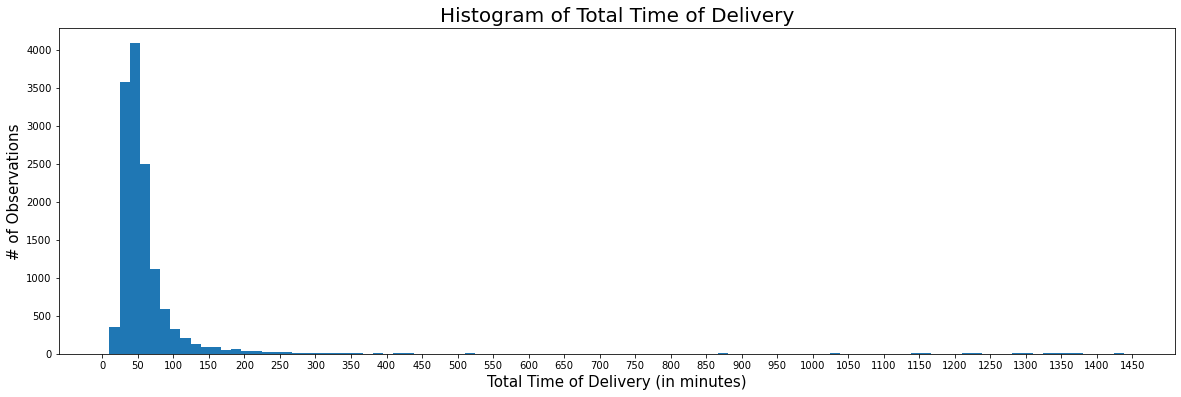

In [11]:
plt.figure(figsize=(20,6))

plt.hist(data.Customer_to_delivered_to_consumer_min_diff, bins=100)
plt.title("Histogram of Total Time of Delivery", fontsize = 20)
plt.xlabel("Total Time of Delivery (in minutes)", fontsize = 15)
plt.ylabel("# of Observations", fontsize = 15)
plt.xticks(np.arange(0, 1500, 50))

plt.show()

****
Using the histogram above as well as the table summary above describing the histogram results, the average total time of delivery (i.e., Customer_to_delivered_to_consumer_min_diff) was approximately 68 minutes for this month's worth of data. 

Comparing the 3 delivery hand-off time differences (i.e., from customer to restaurant, from restaurant to driver, from driver to customer), the time between the order being pick up from the restuarant by the driver/Dasher was relatively longer (compared to the other two) at around 30 minutes. As we continue to inspect and analyze the data, we will see if these is a recurring issue and if so, then it is an area for improve for the restaurants not having the food ready at an appropriate amount of time for the Dashers to pick up or the Dashers taking on longer distance pick ups that increase such time gaps between delivery.
****

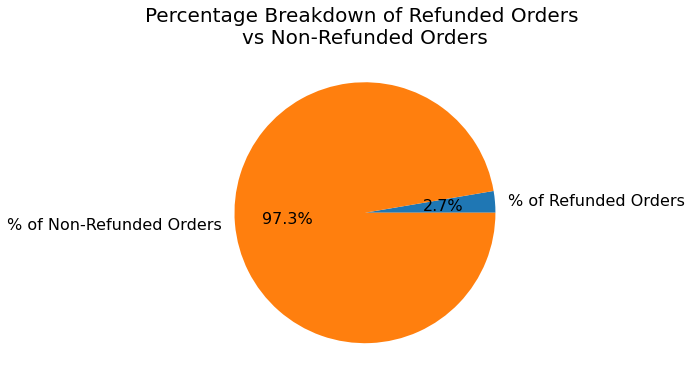

In [12]:
refunded_data = data.loc[data.Refunded_amount > 0]

plt.figure(figsize=(20,6))

plt.pie([len(refunded_data)/len(data), (len(data)-len(refunded_data))/len(data)],
        labels=["% of Refunded Orders", "% of Non-Refunded Orders"], textprops={'fontsize': 16}, autopct=("%1.1f%%"))

plt.title("Percentage Breakdown of Refunded Orders \nvs Non-Refunded Orders", fontsize = 20)


plt.show()

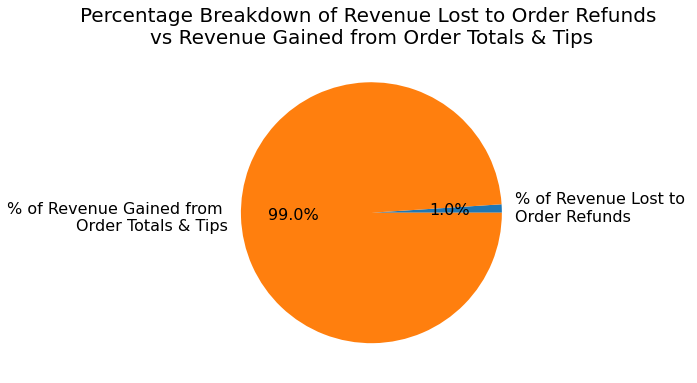

In [13]:
plt.figure(figsize=(20,6))

plt.pie([sum(refunded_data.Refunded_amount) / (sum(data.Order_total) + sum(data.Amount_of_tip)), ((sum(data.Order_total) + sum(data.Amount_of_tip)) - sum(refunded_data.Refunded_amount)) / (sum(data.Order_total) + sum(data.Amount_of_tip))],
        labels=["% of Revenue Lost to \nOrder Refunds", "% of Revenue Gained from \nOrder Totals & Tips"], textprops={'fontsize': 16}, autopct=("%1.1f%%"))

plt.title("Percentage Breakdown of Revenue Lost to Order Refunds \nvs Revenue Gained from Order Totals & Tips", fontsize = 20)


plt.show()

****
Before going more deep/granular into the dataset, it is important to understand the breakdown of the number of orders refunded and how much revenue is lost to refunds to ensure there are no alarming concerns with this month's business performance. As illustrated by the two pie charts above, the number of refunded orders was 2.7% of total orders and the revenue lost from refunded orders (defined as Refunded Amount) was 1.0% of total revenue (defined as Order Total plus Amount of Tip).

Although the number of refunded orders was only 2.7% (or 361 orders) of total orders, it is important to understand why these orders were refunded to improve the business performance and apply such learnings to retain these customers for future orders and future expansion efforts into other regions/cities/states.
****

In [14]:
refunded_data.Delivery_Region.value_counts()

Palo Alto        211
Mountain View     86
San Jose          63
None               1
Name: Delivery_Region, dtype: int64

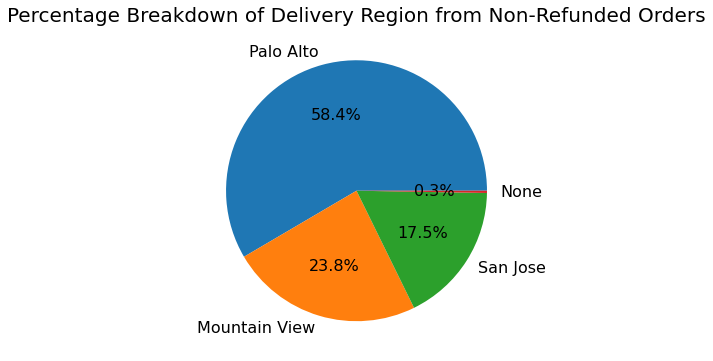

In [15]:
plt.figure(figsize=(20,6))

plt.pie(refunded_data.Delivery_Region.value_counts(), labels=refunded_data.Delivery_Region.value_counts().index.tolist(), 
        textprops={'fontsize': 16}, autopct=("%1.1f%%"))

plt.title("Percentage Breakdown of Delivery Region from Non-Refunded Orders", fontsize = 20)


plt.show()

In [16]:
non_refunded_data = data.loc[data.Refunded_amount == 0]

non_refunded_data.Delivery_Region.value_counts()

Palo Alto        8422
Mountain View    2677
San Jose         2050
None               14
Name: Delivery_Region, dtype: int64

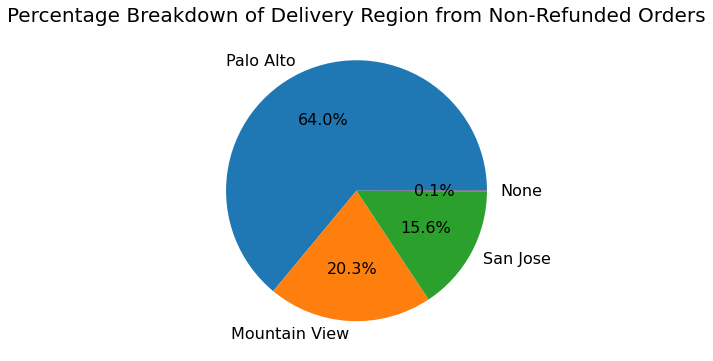

In [17]:
plt.figure(figsize=(20,6))

plt.pie(non_refunded_data.Delivery_Region.value_counts(), labels=non_refunded_data.Delivery_Region.value_counts().index.tolist(), 
        textprops={'fontsize': 16}, autopct=("%1.1f%%"))

plt.title("Percentage Breakdown of Delivery Region from Non-Refunded Orders", fontsize = 20)


plt.show()

****
Looking at the Delivery Region percentage breakdown between Refunded and Non-Refunded Orders, there does not appear to a be a skew to a specific that is causing refunded orders because the percentage magnitudes between the two order groups are relatively similar. This does not appear to be a cause of concern for this month.

However, this percentage breakdown does highlight the opportunity to grow the business further in Mountain View and San Jose either through increasing restaurant partnerships for delivery, adding more drivers/Dashers and/or increasing customer marketing in such regions so they can closely match the level of orders in Palo Alto.
****

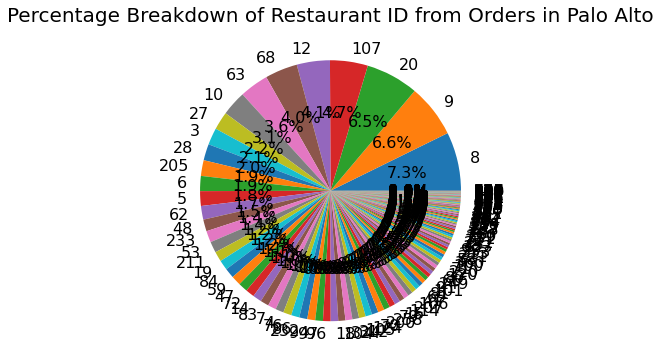

In [18]:
plt.figure(figsize=(20,6))

plt.pie(data.loc[data.Delivery_Region == "Palo Alto"].Restaurant_ID.value_counts(), 
        labels=data.loc[data.Delivery_Region == "Palo Alto"].Restaurant_ID.value_counts().index.tolist(), 
        textprops={'fontsize': 16}, autopct=("%1.1f%%"))

plt.title("Percentage Breakdown of Restaurant ID from Orders in Palo Alto", fontsize = 20)


plt.show()

****
Focusing a little more in the Palo Alto Region, there is definitely an opportunity to breakdown and identify the specific restaurants driving majority of the order volumes because such restaurants are more favorable or enticing for customers to order from and more consistently. Whether it be Mexican or Chinese food type restaurants, identifying such skews for any region are important for driving more partnership opportunities such as providing more discounting opportunities or marketing efforts on the applications. The more orders that can be increased from such partnerships the better, especially in a business where customers are more likely to repeat their purchases and more frequently.

A similar view can be applied to Consumer ID in order to identify which consumers are heavy, medium and light users. Defining and targeting each group are important for retaining and upselling users. Overall, since the restaurant and consumer data are simplified, we cannot dive into more demographic analyses.
****

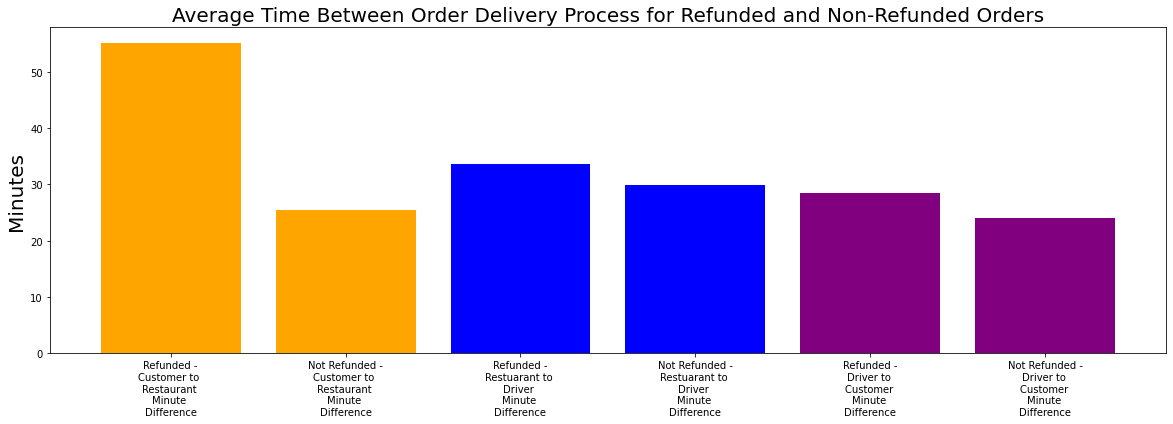

In [19]:
plt.figure(figsize=(20,6))

plt.bar(["Refunded -\nCustomer to \nRestaurant \nMinute \nDifference", "Not Refunded -\nCustomer to \nRestaurant \nMinute \nDifference", 
    "Refunded -\nRestuarant to \nDriver \nMinute \nDifference", "Not Refunded -\nRestuarant to \nDriver \nMinute \nDifference",
    "Refunded -\nDriver to \nCustomer \nMinute \nDifference", "Not Refunded -\nDriver to \nCustomer \nMinute \nDifference"],
        [sum(refunded_data.Customer_to_restaurant_placed_order_min_diff)/ len(refunded_data.Customer_to_restaurant_placed_order_min_diff), 
        sum(non_refunded_data.Customer_to_restaurant_placed_order_min_diff)/ len(non_refunded_data.Customer_to_restaurant_placed_order_min_diff),
        sum(refunded_data.Restaurant_to_driver_at_restuarant_min_diff)/ len(refunded_data.Restaurant_to_driver_at_restuarant_min_diff),
        sum(non_refunded_data.Restaurant_to_driver_at_restuarant_min_diff)/ len(non_refunded_data.Restaurant_to_driver_at_restuarant_min_diff),
        sum(refunded_data.Driver_to_delivered_to_consumer_min_diff)/ len(refunded_data.Driver_to_delivered_to_consumer_min_diff),
        sum(non_refunded_data.Driver_to_delivered_to_consumer_min_diff)/ len(non_refunded_data.Driver_to_delivered_to_consumer_min_diff)], 
        color=["orange", "orange", "blue", "blue", "purple", "purple"])
            
plt.ylabel("Minutes", fontsize = 20)
plt.title("Average Time Between Order Delivery Process for Refunded and Non-Refunded Orders", fontsize=20)


plt.show()

***
Comparing the average minute differences between refunded orders vs non-refunded orders by the 3 delivery hand-offs (i.e., from customer to restaurant, from restaurant to driver, from driver to customer), the bar chart above highlights the biggest time difference is between the customers placing orders and the restaurant receiving the orders. On average refunded orders spent 30 minutes extra in this inital step of the delivery process.

This can be either an issue with the DoorDash application not properly providing the restaurant partner with the order on time or with the restaurant not accepting/recording the order on a proper time either due to resource restrictions (with staff or in-person customers) or hesitance with accepting certain orders they deem risky (e.g., distance between the customer and the restaurant).

This is certainly an area for concern as this inital step is crucial for an order not to be refunded because even if the other two subsequent steps in the process arrive at a proper time, the order can still get refunded due to the inital step in the process causing the most wait time. Whether its improving the systems that place the orders or communicating to restaurant partners about the importance of accepting orders at an appropriate amount of time, improving the initial step in the delivery process is key to reducing refunded orders and retaining such customers for future orders.
****

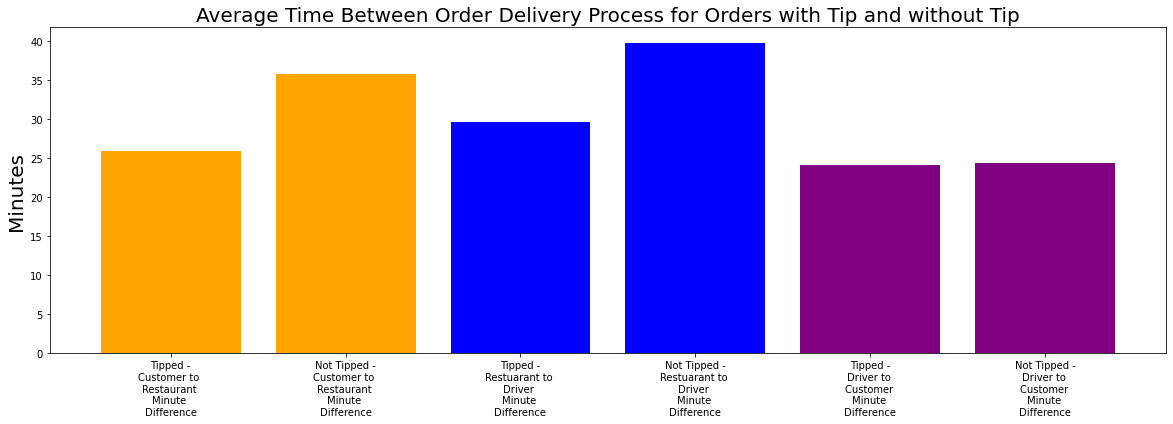

In [20]:
tip_data = data.loc[data.Amount_of_tip > 0]
non_tip_data = data.loc[data.Amount_of_tip == 0]

plt.figure(figsize=(20,6))

plt.bar(["Tipped -\nCustomer to \nRestaurant \nMinute \nDifference", "Not Tipped -\nCustomer to \nRestaurant \nMinute \nDifference", 
        "Tipped -\nRestuarant to \nDriver \nMinute \nDifference", "Not Tipped -\nRestuarant to \nDriver \nMinute \nDifference",
        "Tipped -\nDriver to \nCustomer \nMinute \nDifference", "Not Tipped -\nDriver to \nCustomer \nMinute \nDifference"],
        [sum(tip_data.Customer_to_restaurant_placed_order_min_diff)/ len(tip_data.Customer_to_restaurant_placed_order_min_diff), 
        sum(non_tip_data.Customer_to_restaurant_placed_order_min_diff)/ len(non_tip_data.Customer_to_restaurant_placed_order_min_diff),
        sum(tip_data.Restaurant_to_driver_at_restuarant_min_diff)/ len(tip_data.Restaurant_to_driver_at_restuarant_min_diff),
        sum(non_tip_data.Restaurant_to_driver_at_restuarant_min_diff)/ len(non_tip_data.Restaurant_to_driver_at_restuarant_min_diff),
        sum(tip_data.Driver_to_delivered_to_consumer_min_diff)/ len(tip_data.Driver_to_delivered_to_consumer_min_diff),
        sum(non_tip_data.Driver_to_delivered_to_consumer_min_diff)/ len(non_tip_data.Driver_to_delivered_to_consumer_min_diff)],
        color=["orange", "orange", "blue", "blue", "purple", "purple"])

plt.ylabel("Minutes", fontsize = 20)
plt.title("Average Time Between Order Delivery Process for Orders with Tip and without Tip", fontsize=20)

plt.show()

***
Comparing the 3 steps in the delivery process, customers were more likely to tip when the first two steps in the process took less time. Getting these two steps in the delivery process are key for making a customer feel satisfied with their delivery time as customers are more likely to tip when they feel the quality of service was met. To increase such customer behaviors that are a win-win for both customer and driver, it is important to communicate to the restaurant partners to accept/receive order at an approprate amount of time (around 25 minutes) and to have the food prepared at an appropriate amount of time (around 30 minutes) for the drivers/Dashers to pick up. With regards to this recommendation for restaurant partners to have food orders ready for drivers assumes drivers arrive at an appropriate time to pick up the food from the restaurants. 
****

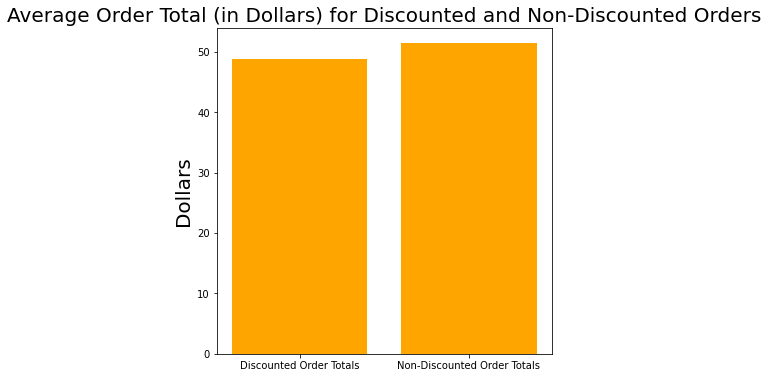

In [21]:
discount_data = data.loc[data.Amount_of_discount > 0]
non_discount_data = data.loc[data.Amount_of_discount == 0]

plt.figure(figsize=(6,6))

plt.bar(["Discounted Order Totals", "Non-Discounted Order Totals"],
        height=[sum(discount_data.Order_total)/ len(discount_data.Order_total), 
        sum(non_discount_data.Order_total)/ len(non_discount_data.Order_total)],
        color=["orange", "orange", "blue", "blue", "purple", "purple"])

plt.ylabel("Dollars", fontsize = 20)
plt.title("Average Order Total (in Dollars) for Discounted and Non-Discounted Orders", fontsize=20)


plt.show()

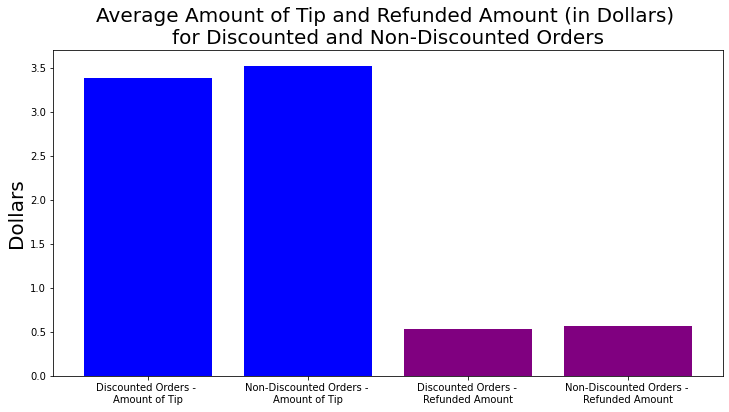

In [22]:
discount_data = data.loc[data.Amount_of_discount > 0]
non_discount_data = data.loc[data.Amount_of_discount == 0]

plt.figure(figsize=(12,6))

plt.bar(["Discounted Orders - \nAmount of Tip", "Non-Discounted Orders - \nAmount of Tip",
        "Discounted Orders - \nRefunded Amount", "Non-Discounted Orders - \nRefunded Amount"],
        [sum(discount_data.Amount_of_tip)/ len(discount_data.Amount_of_tip),
        sum(non_discount_data.Amount_of_tip)/ len(non_discount_data.Amount_of_tip),
        sum(discount_data.Refunded_amount)/ len(discount_data.Refunded_amount),
        sum(non_discount_data.Refunded_amount)/ len(non_discount_data.Refunded_amount)],
        color=["blue", "blue", "purple", "purple"])

plt.ylabel("Dollars", fontsize = 20)
plt.title("Average Amount of Tip and Refunded Amount (in Dollars) \nfor Discounted and Non-Discounted Orders", fontsize=20)


plt.show()

****
When comparing discounted orders from non-discounted ones, there does not appear to be a clear advantage from discounted orders as it relates to the performance of order totals, amount of tip and refunded amounts. The level of dollars gained (from order totals and tips) and lost (from refunds) appear to be relatively on par with each other. 

However, this does not mean that discounted orders offer no advantage. With more customer account information and months worth of data, it can be that discounted orders serve to retain existing customers and/or increase their number of orders, which is all masked by looking at these averages. Discounted orders will need more data and tracking to determine where it needs improving but it definitely offers more implicit advantages to maintaining and capturing new users to the app.
****

# Example SQL Queries

Below is the example SQL query that would mimic this python code that drops missing/NULL data:  data.dropna(inplace=True)

SELECT * FROM data WHERE Placed_order_with_restaurant_datetime IS NOT NULL AND Driver_at_restaurant_datetime IS NOT NULL;

****
Below is a query would mimic this python code that isolates observations/rows with refund amounts greater than 0: refunded_data = data.loc[data.Refunded_amount > 0]

SELECT * FROM data WHERE Placed_order_with_restaurant_datetime IS NOT NULL AND Driver_at_restaurant_datetime IS NOT NULL AND Refunded_amount > 0;

***
Below is a query that would mimic this python code that isolates observations/rows with refunded amounts of 0 and groups by Delivery Region; non_refunded_data.Delivery_Region.value_counts()

SELECT Delivery_Region, COUNT(Delivery_Region) FROM data WHERE Placed_order_with_restaurant_datetime IS NOT NULL AND Driver_at_restaurant_datetime IS NOT NULL AND Refunded_amount = 0 GROUP BY Delivery_Region ORDER BY COUNT(Delivery_Region) DESC;

***
Below is a query that would mimic this python code that takes the average of customer to restaurant minute difference for customers that tipped greater than 0; sum(tip_data.Customer_to_restaurant_placed_order_min_diff)/ len(tip_data.Customer_to_restaurant_placed_order_min_diff)

SELECT AVG(Customer_to_restaurant_placed_order_min_diff) FROM data WHERE Placed_order_with_restaurant_datetime IS NOT NULL AND Driver_at_restaurant_datetime IS NOT NULL AND Amount_of_tip > 0;